<a href="https://colab.research.google.com/github/princeK9/Stock-Price-Prediction/blob/main/Proj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['stocks.csv']))
df.head()


Saving stocks.csv to stocks.csv


,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


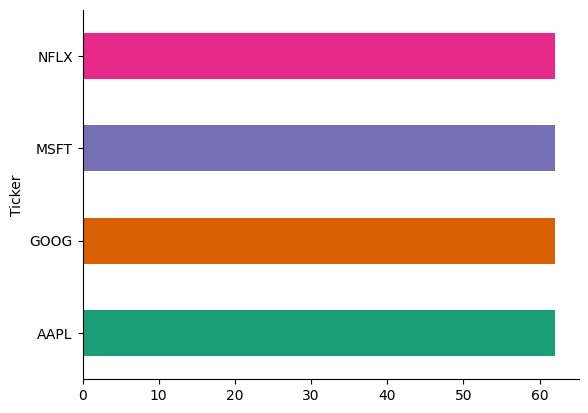

In [35]:
# @title Ticker

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Ticker').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

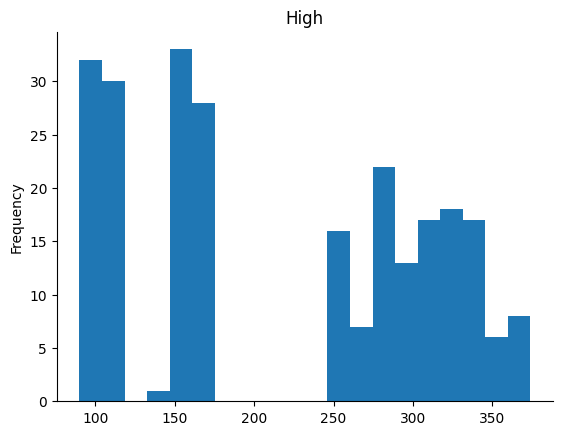

In [34]:
# @title High

from matplotlib import pyplot as plt
df['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

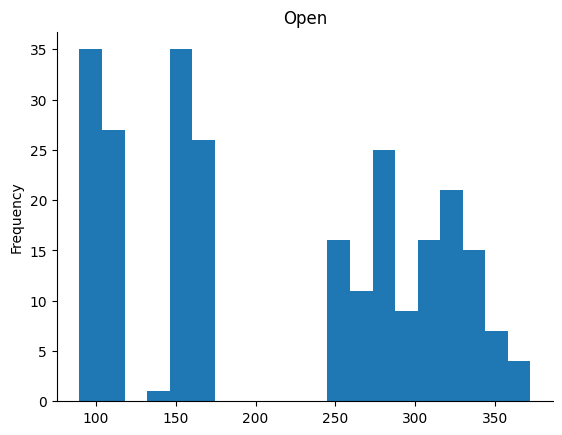

In [33]:
# @title Open

from matplotlib import pyplot as plt
df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
print(df.columns)

Index(['Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [11]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']
target = 'Adj Close'


print(df.isnull().sum())

df.fillna(method='ffill', inplace=True)


Ticker       0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [42]:
# List of unique tickers in the dataset
tickers = df['Ticker'].unique()

for ticker in tickers:

    ticker_data = df[df['Ticker'] == ticker]


    X = ticker_data[features]
    y = ticker_data[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)



    # Linear Regression
    lr_model = LinearRegression()
    lr_model.fit(X_train_scaled, y_train)
    lr_predictions = lr_model.predict(X_test_scaled)

    # Random Forest Regressor
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train_scaled, y_train)
    rf_predictions = rf_model.predict(X_test_scaled)


    # Evaluation
    def evaluate_model(y_true, y_pred):
        mae = mean_absolute_error(y_true, y_pred)
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))
        r2 = r2_score(y_true, y_pred)
        return mae, rmse, r2

    # Evaluation for Linear Regression
    lr_mae, lr_rmse, lr_r2 = evaluate_model(y_test, lr_predictions)
    print(f"Linear Regression for {ticker} - MAE: {lr_mae}, RMSE: {lr_rmse}, R²: {lr_r2}")

    # Evaluation for Random Forest
    rf_mae, rf_rmse, rf_r2 = evaluate_model(y_test, rf_predictions)
    print(f"Random Forest for {ticker} - MAE: {rf_mae}, RMSE: {rf_rmse}, R²: {rf_r2}")


Linear Regression for AAPL - MAE: 0.03279310974773116, RMSE: 0.06885270274485912, R²: 0.9999368249521272
Random Forest for AAPL - MAE: 0.5818916438176066, RMSE: 0.696715621885433, R²: 0.9935313345419127
Linear Regression for MSFT - MAE: 0.13692456213527093, RMSE: 0.2498775154131548, R²: 0.999842394712087
Random Forest for MSFT - MAE: 1.029460249680743, RMSE: 1.3510404944045873, R²: 0.9953926292686054
Linear Regression for NFLX - MAE: 0.0, RMSE: 0.0, R²: 1.0
Random Forest for NFLX - MAE: 1.356442847618688, RMSE: 1.9692309697005679, R²: 0.9890535215198384
Linear Regression for GOOG - MAE: 0.0, RMSE: 0.0, R²: 1.0
Random Forest for GOOG - MAE: 0.3116341693584734, RMSE: 0.42082066989195205, R²: 0.9961643125890491


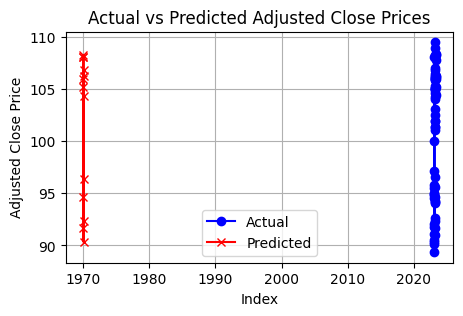

In [41]:
import matplotlib.pyplot as plt

# Assuming predictions and y are defined and contain numerical values
plt.figure(figsize=(5, 3))
plt.plot(y, label='Actual', marker='o', linestyle='-', color='blue')
plt.plot(rf_predictions, label='Predicted', marker='x', linestyle='-', color='red')
plt.title('Actual vs Predicted Adjusted Close Prices')
plt.xlabel('Index')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid(True)
plt.show()


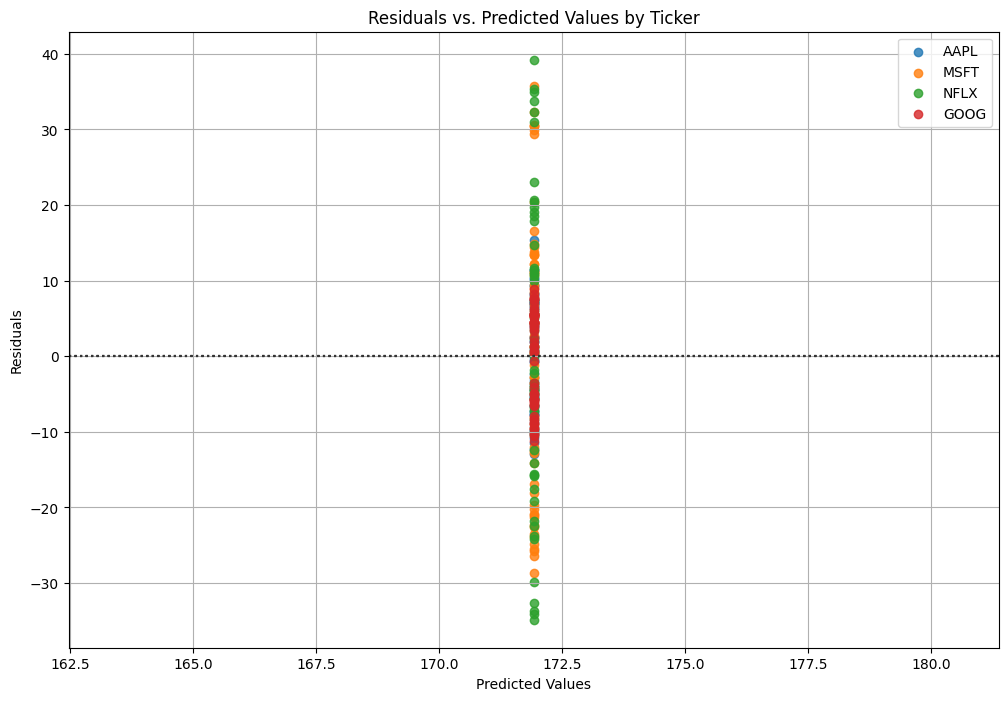

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

tickers = df['Ticker'].unique()

plt.figure(figsize=(12, 8))


for ticker in tickers:
    ticker_data = df[df['Ticker'] == ticker]
    y_test_ticker = ticker_data[target]
    y_pred_ticker = rf_model.predict(ticker_data[features])
    residuals_ticker = y_test_ticker - y_pred_ticker


    sns.residplot(x=y_pred_ticker, y=residuals_ticker, lowess=True, label=ticker,
                  line_kws={'color': 'red', 'lw': 1})

plt.title('Residuals vs. Predicted Values by Ticker')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()